In [4]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [5]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [6]:
roc_curve = RocCurveDisplay.from_estimator

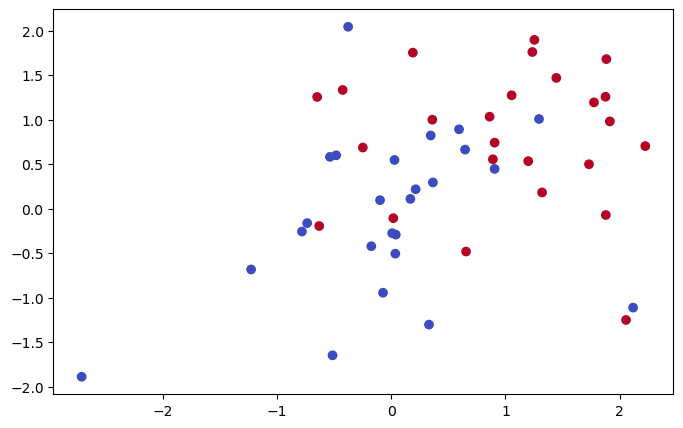

In [11]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = subplots(figsize=(8, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [13]:
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

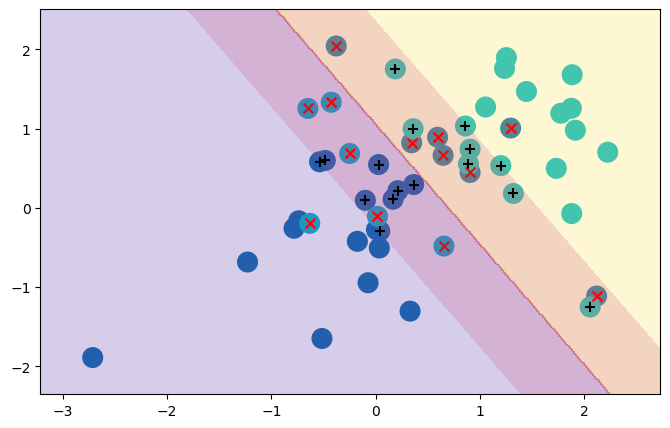

In [14]:
fig, ax = subplots(figsize=(8, 5))
plot_svm(X, y, svm_linear, ax=ax)

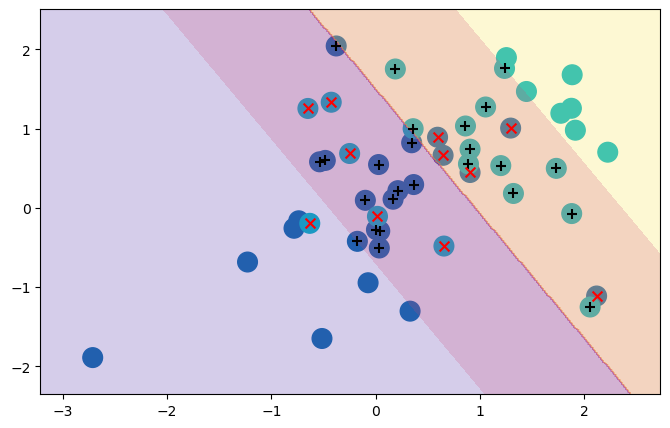

In [16]:
svm_linear_small = SVC(C=0.1, kernel="linear")
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8, 5))
plot_svm(X, y, svm_linear_small, ax=ax)

In [18]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [19]:
kfold = skm.KFold(5, 
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [20]:
grid.cv_results_[("mean_test_score")]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [21]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test == 1] += 1

In [22]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


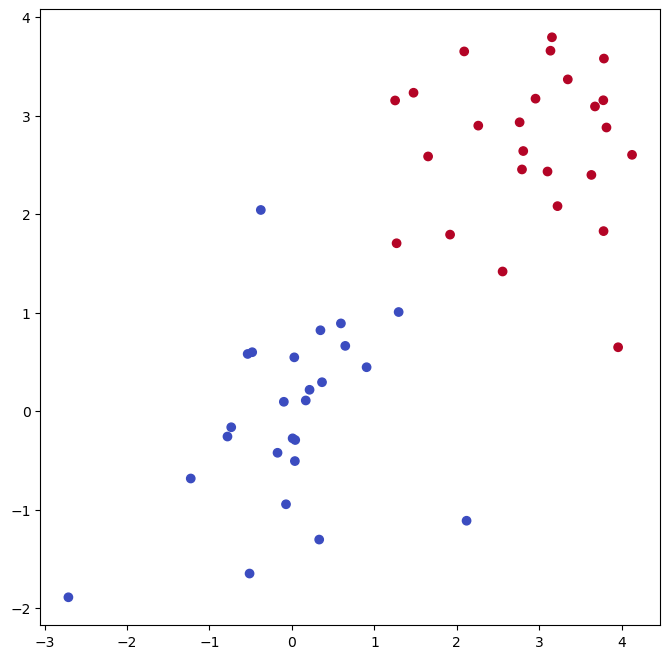

In [23]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [24]:
svm_ = SVC(C=1e5, kernel="linear").fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


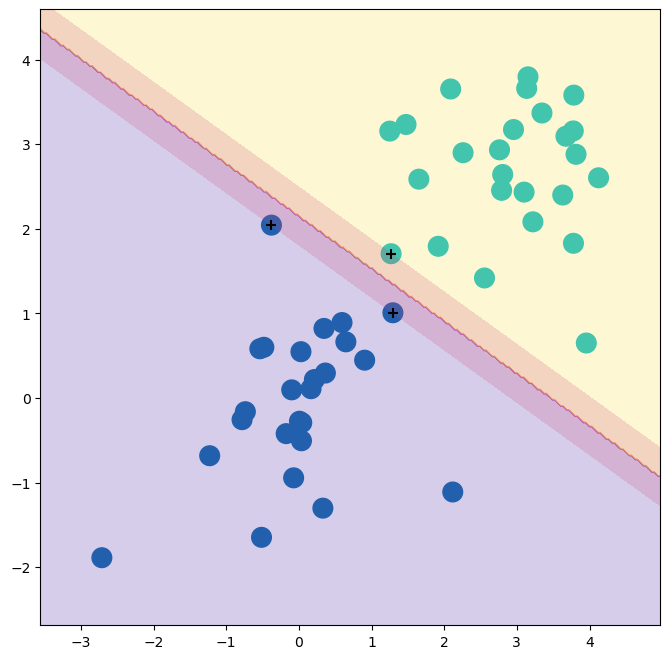

In [25]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X, y, svm_, ax=ax)

In [26]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


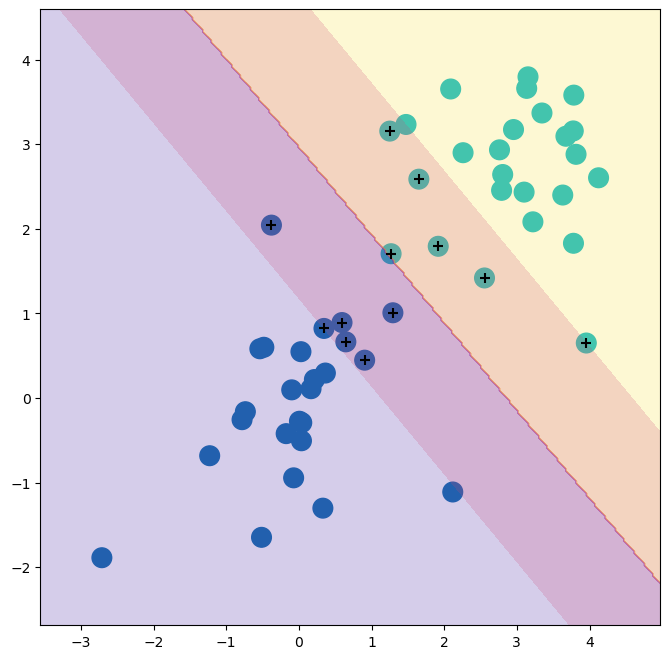

In [27]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)